In [12]:
import nibabel as nib
import numpy as np

In [2]:
# A function that tests the number of voxels that are useful in a DWI.
path = "../Data-NODDI/s01_still/s01_still_NDI.nii"
ODI_img = nib.load(path)
ODI_data = ODI_img.get_fdata()
non_zero = 0
zeros = 0
for ele in ODI_data:
    for el in ele:
        for e in el:
            if e != 0.0:
                non_zero += 1
            else:
                zeros += 1
print(non_zero)
print(zeros)
print("useful voxels ratio: "+str(non_zero/(non_zero + zeros)))

81650
271150
useful voxels ratio: 0.2314342403628118


In [20]:
# packages that helps to evaluate the model performace
from utils import calc_RMSE, calc_psnr, calc_ssim
def evaluate_model(pred, target, mask):
    rmse = calc_RMSE(pred, target, mask)
    psnr = calc_psnr(pred, target)
    ssim = calc_ssim(pred, target)
    return(rmse, psnr, ssim)

In [3]:
class Namespace:
    """
    a class generate parser for cmd line args
    """
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [4]:
"""
packages that generate train/test dataset
"""
from FormatData import generate_data, parser as data_parser

In [5]:
"""
packages that trains network
"""
from Training import train_network
from utils.model import parser as model_parser

In [6]:
"""
packages that test network
"""
from Testing import test_model

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(cmd):
    """
    A function that used to plot the loss curve for the trained network.
    Args:
        cmd: String, the command line in the terminal
    """
    args = model_parser().parse_args(cmd.split())
    history = train_network(args)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

<h3>Experiment 1. We want to discover the number of hidden acquired to produce promising each NODDI measure.</h3>

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; ANN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-1d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-1d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>


In [8]:
"""
Generate training dataset NDI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [9]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type N --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [22]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_NDI_path = '../Data-NODDI/s02_still/s02_still_NDI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_NDI_img = nib.load(s02_NDI_path)
s02_NDI_img_data = s02_NDI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>Train ANNs with different number of layers.<br/>
Herein, at most 6-hidden-layer ANNs are trained.<br/>
Loss curve for each ANN is plotted.<br/>
The test result is also generated -- evaluation method used is RMSE between pred and reference.<br/>
The reference image and the genereated image are displayed side by side</strong>

<strong>1 layer</strong>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense (Dense)                (None, 150)               14550     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...
Epoch 1/100
260/260 [==============================] - 4s 15ms/step - loss: 0.2251 - accuracy: 0.0231 - val_loss: 0.0961 - val_accuracy: 0.0092
Epoch 2/100
260/260 [==============================] - 2s 6ms/step - loss: 0.1376 - ac

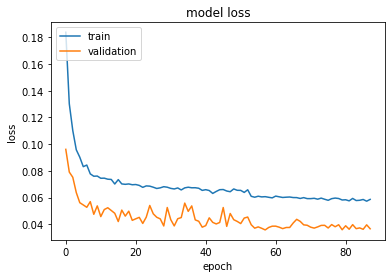

In [10]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type N"
plot_loss(cmd)

In [11]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_1 (Dense)              (None, 84, 50, 150)       14550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.07982377640549633


/home/victor/anaconda3/envs/project/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


(0.07982377640549633, -63.76370112945309, 0.9844016262248244)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

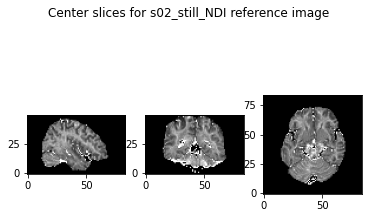

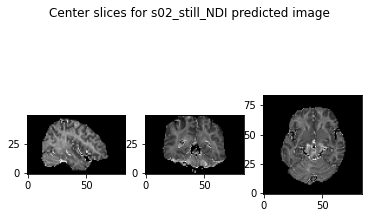

In [26]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>2 layer</strong>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...
Epoch 1/100
260/260 [==============================] - 2s 6ms/step - loss: 0.1932 - accuracy: 0.

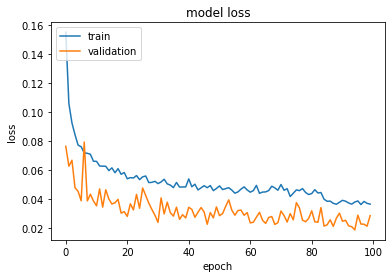

In [23]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type N"
plot_loss(cmd)

In [27]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_4 (Dense)              (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_5 (Dense)              (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.07422953660050956


/home/victor/anaconda3/envs/project/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


(0.07422953660050956, -65.21688656213924, 0.987092629171078)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

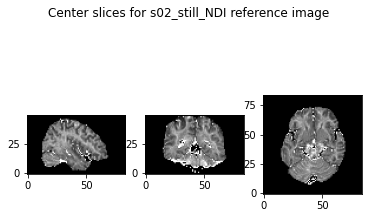

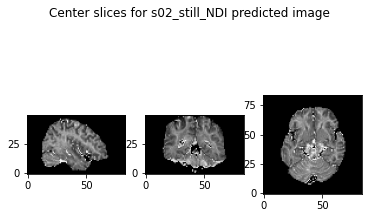

In [28]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>3 layer</strong>

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_______________________________________________________

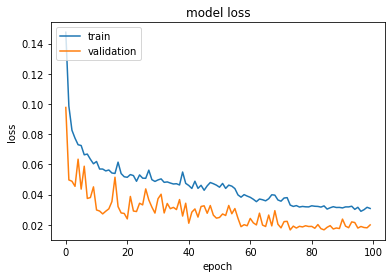

In [29]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type N"
plot_loss(cmd)

In [30]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_9 (Dense)              (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_10 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_11 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_5 (Dropout)          (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
________________________________________

(0.06127795752454123, -69.05172543468217, 0.9908900888525293)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

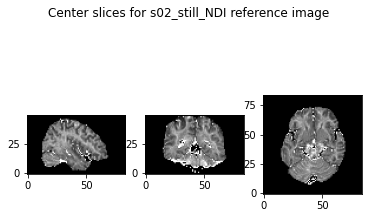

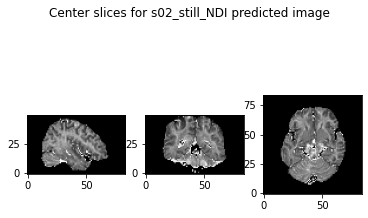

In [31]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>4 layer</strong>

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_13 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_14 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_15 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151 

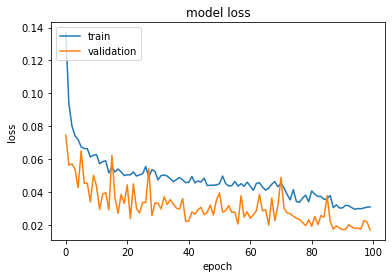

In [32]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type N"
plot_loss(cmd)

In [33]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_16 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_17 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_18 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_19 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_7 (Dropout)          (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 

(0.05537797604718797, -71.0764899186083, 0.9927546301998449)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

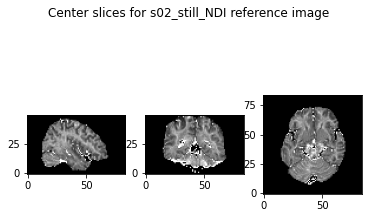

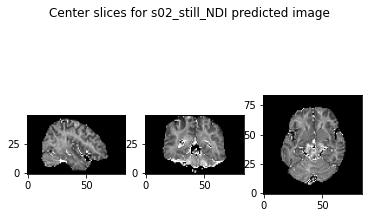

In [34]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>5 layer</strong>

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_23 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_24 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0   

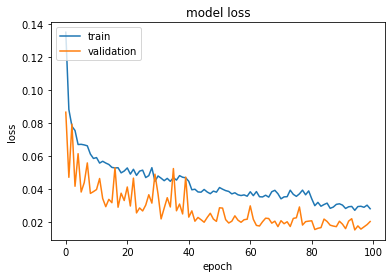

In [35]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type N"
plot_loss(cmd)

In [36]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_25 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_26 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_27 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_28 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_29 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_9 (Dropout)          (None, 84, 50, 

(0.05888363262929056, -69.84886596795374, 0.9918643385768637)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

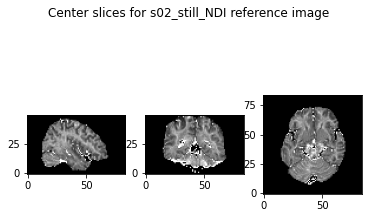

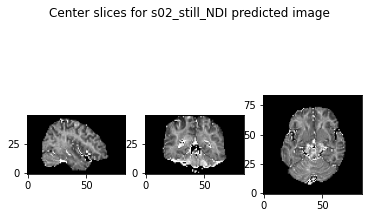

In [37]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>6 layer</strong>

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_30 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_32 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_34 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_35 (Dense)             (None, 150)               226

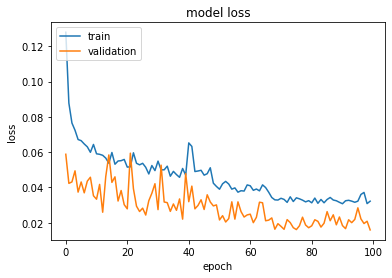

In [38]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type N"
plot_loss(cmd)

In [39]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_36 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_37 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_38 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_39 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_40 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_41 (Dense)             (None, 84, 50,

(0.055246342890090255, -71.12408640388414, 0.9928102257642789)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

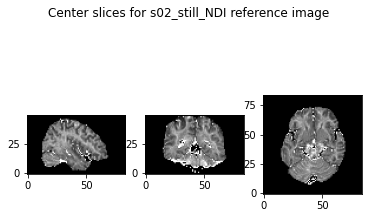

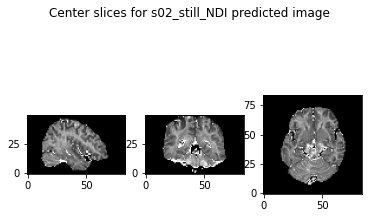

In [40]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: ODI</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-ODI-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [41]:
"""
Generate training dataset ODI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [42]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type O --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [43]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_ODI_path = '../Data-NODDI/s02_still/s02_still_ODI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_ODI_img = nib.load(s02_ODI_path)
s02_ODI_img_data = s02_ODI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...
Epoch 1/100
260/260 [==============================] - 2s 6ms/step - loss: 0.2347 - accuracy: 0.0020 - val_loss: 0.0959 - val_accuracy: 6.6353e-04
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 0.112

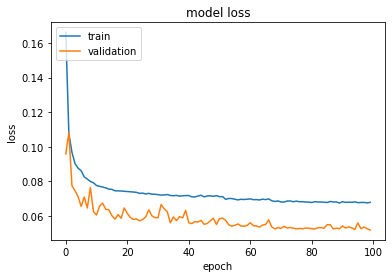

In [48]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type O"
plot_loss(cmd)

In [49]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_49 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dropout_16 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.0664988426425915


(0.0664988426425915, -67.41643845570606, 0.9858211368472902)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

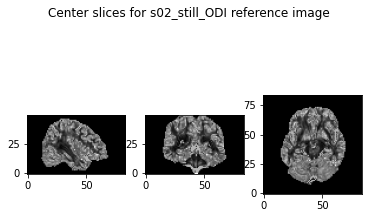

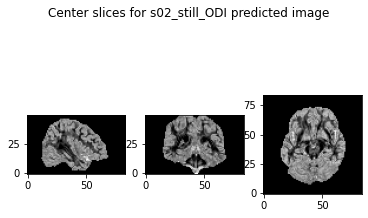

In [50]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>2 layer</strong>

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_50 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_51 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_17 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...
Epoch 1/100
260/260 [==============================] - 1s 4ms/step - loss: 0.1470 - accuracy: 0

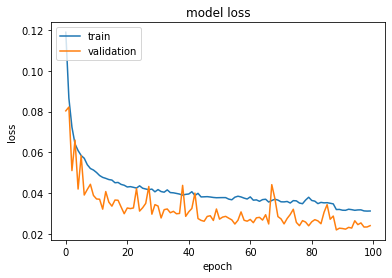

In [51]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type O"
plot_loss(cmd)

In [52]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_52 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_53 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_18 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.04283285859197247


(0.04283285859197247, -76.21401868305446, 0.994043742827575)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

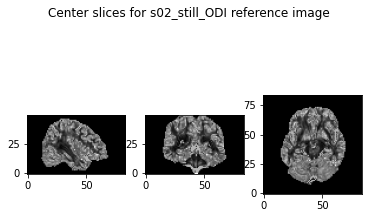

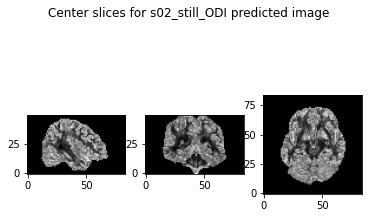

In [54]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>3 layer</strong>

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_54 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_55 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_56 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
______________________________________________________

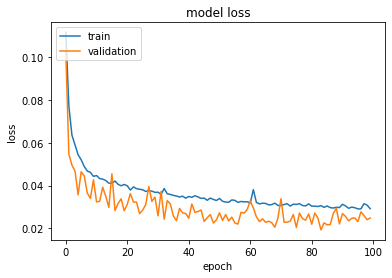

In [55]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type O"
plot_loss(cmd)

In [56]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_57 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_58 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_59 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_20 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_______________________________________

(0.04257986424032493, -76.33249990369441, 0.9940855282457189)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

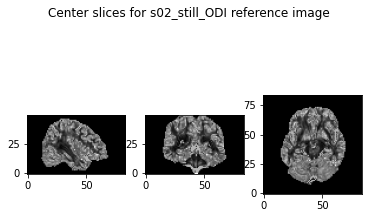

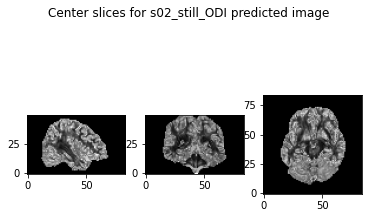

In [57]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>4 layer</strong>

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_61 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_62 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_63 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_21 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151

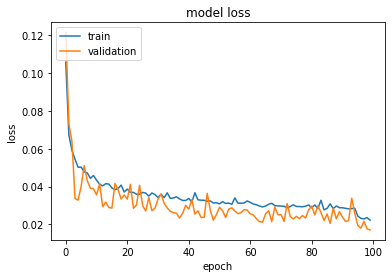

In [58]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type O"
plot_loss(cmd)

In [59]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_64 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_65 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_66 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_67 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_22 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50,

(0.037479351631677614, -78.88432616204811, 0.9955457669627711)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

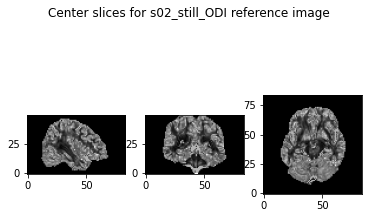

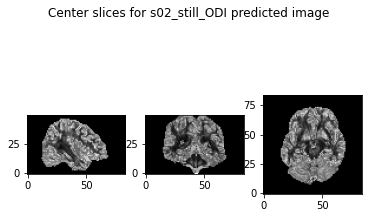

In [60]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>5 layer</strong>

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_68 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_69 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_70 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_71 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_72 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_23 (Dropout)         (None, 150)               0  

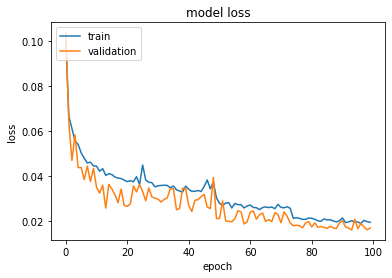

In [61]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type O"
plot_loss(cmd)

In [62]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_73 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_74 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_75 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_76 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_77 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_24 (Dropout)         (None, 84, 50,

(0.037228413259871924, -79.0186839846169, 0.9955838072025872)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

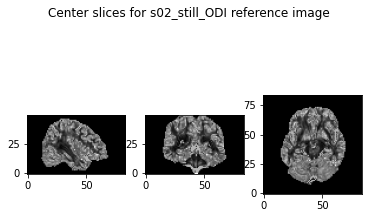

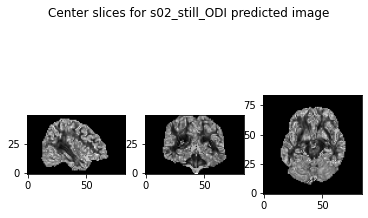

In [63]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>6 layer</strong>

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_78 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_79 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_80 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_81 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_82 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_83 (Dense)             (None, 150)               226

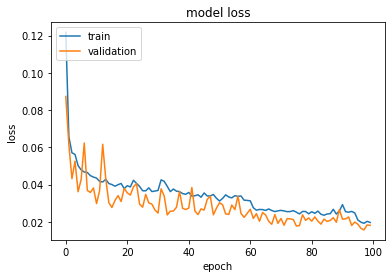

In [64]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type O"
plot_loss(cmd)

In [65]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_84 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_85 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_86 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_87 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_88 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_89 (Dense)             (None, 84, 50,

(0.039809507925226174, -77.67801379866452, 0.9948699957078058)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

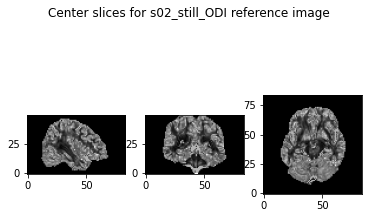

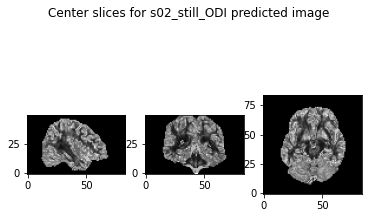

In [66]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: FWF</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-FWF-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
THe testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [67]:
"""
Generate training dataset FWF for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [68]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type F --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [69]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_FWF_path = '../Data-NODDI/s02_still/s02_still_FWF.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_FWF_img = nib.load(s02_FWF_path)
s02_FWF_img_data = s02_FWF_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_90 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_27 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...
Epoch 1/100
260/260 [==============================] - 2s 5ms/step - loss: 0.2417 - accuracy: 0.3853 - val_loss: 0.0532 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0661 - 

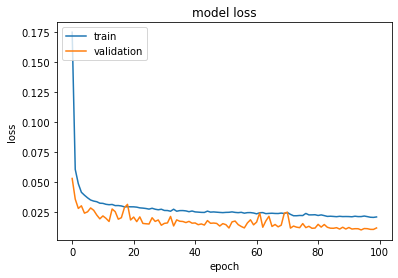

In [70]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type F"
plot_loss(cmd)

In [71]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_91 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dropout_28 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.01985543394725778


(0.01985543394725778, -91.59057492043789, 0.9974290220507707)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

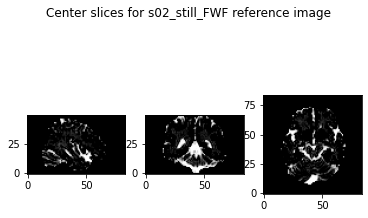

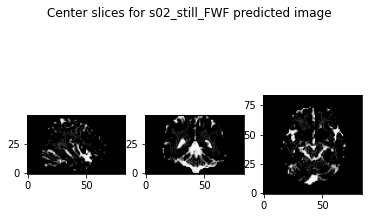

In [72]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>2 layer</strong>

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_92 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_93 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_29 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...
Epoch 1/100
260/260 [==============================] - 2s 7ms/step - loss: 0.0987 - accuracy: 0

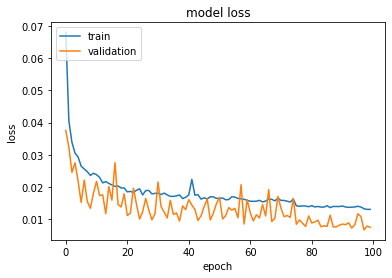

In [73]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type F"
plot_loss(cmd)

In [74]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_94 (Dense)             (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_95 (Dense)             (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_30 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 96)
(84, 84, 50, 1)
0.01146480691818988


(0.01146480691818988, -102.57448781900395, 0.9992224802241668)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

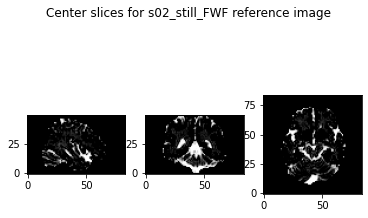

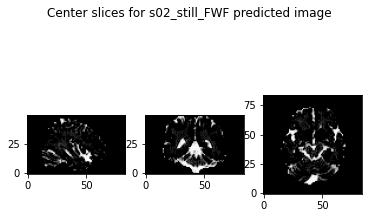

In [75]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>3 layer</strong>

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_99 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_100 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_101 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_32 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
______________________________________________________

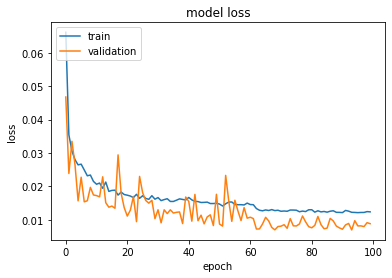

In [77]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type F"
plot_loss(cmd)

In [78]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_102 (Dense)            (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_103 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_104 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_33 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50, 1)         151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_______________________________________

(0.011757445461546048, -102.07039539850848, 0.9991315910711176)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

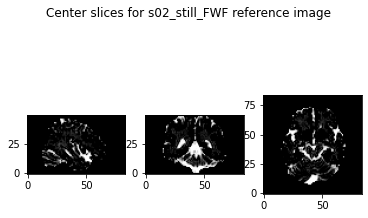

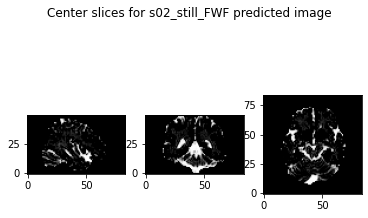

In [79]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>4 layer</strong>

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_113 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_114 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_115 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_116 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_36 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151

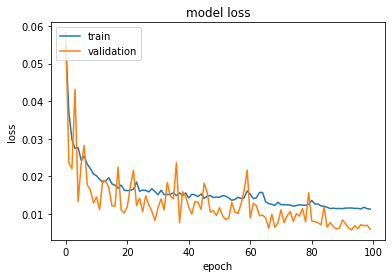

In [83]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type F"
plot_loss(cmd)

In [84]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_117 (Dense)            (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_118 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_119 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_120 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_37 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
output (Dense)               (None, 84, 50,

(0.009664024909315344, -105.99192494810546, 0.9995127549250686)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

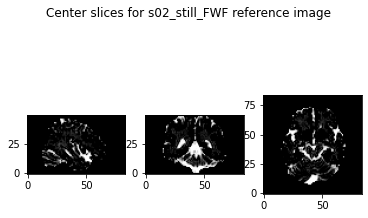

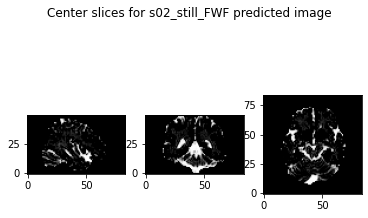

In [85]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
# evaluate the model# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>5 layer</strong>

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_121 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_122 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_123 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_124 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_125 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_38 (Dropout)         (None, 150)               0  

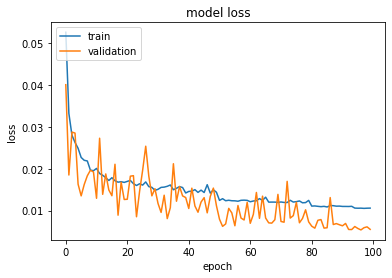

In [86]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type F"
plot_loss(cmd)

In [87]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_126 (Dense)            (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_127 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_128 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_129 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_130 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dropout_39 (Dropout)         (None, 84, 50,

(0.009284586154891108, -106.79301687362508, 0.9995402853664317)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

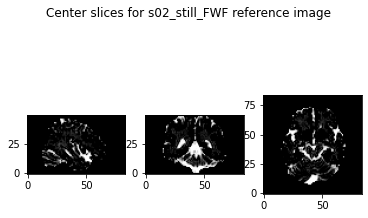

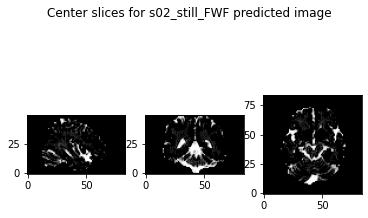

In [88]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>6 layer</strong>

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_143 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_144 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_145 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_146 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_147 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_148 (Dense)            (None, 150)               226

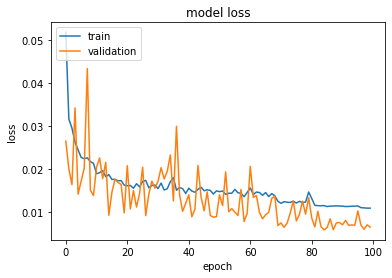

In [92]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type F"
plot_loss(cmd)

In [93]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

train is false
Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
dense_149 (Dense)            (None, 84, 50, 150)       14550     
_________________________________________________________________
dense_150 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_151 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_152 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_153 (Dense)            (None, 84, 50, 150)       22650     
_________________________________________________________________
dense_154 (Dense)            (None, 84, 50,

(0.009490744423343633, -106.35378827322947, 0.9995117197941094)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

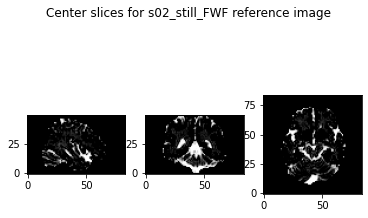

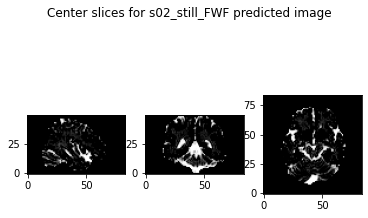

In [94]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")